In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-splines-splines)

For illustration, here is a spline interpolant using just a few nodes.

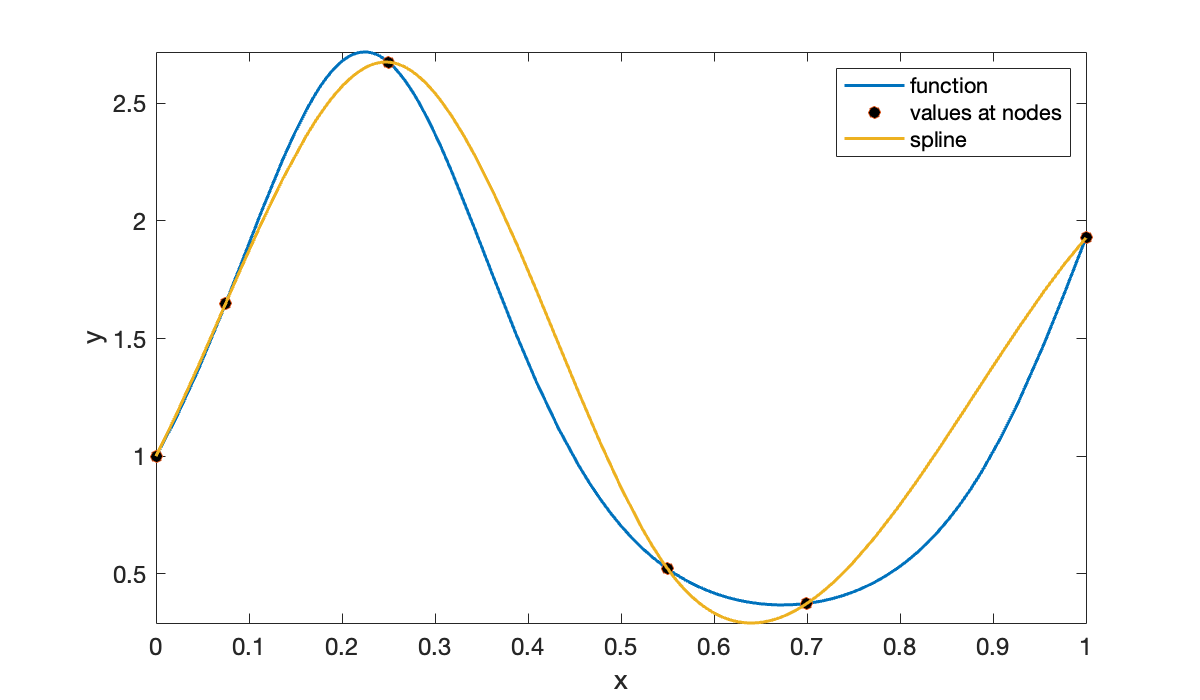

In [2]:
clf
f = @(x) exp(sin(7 * x));
fplot(f, [0, 1], displayname="function")

t = [0, 0.075, 0.25, 0.55, 0.7, 1];    % nodes
y = f(t);                              % values at nodes
hold on, scatter(t, y, displayname="values at nodes")

S = spinterp(t, y);
fplot(S, [0, 1], displayname="spline")

xlabel("x");  ylabel("y")
legend();

Now we look at the convergence rate as the number of nodes increases.

In [3]:
x = (0:10000)' / 1e4;              % sample the difference at many points
n = round(2 .^ (3:0.5:7))';        % numbers of nodes
maxerr = zeros(size(n));
for i = 1:length(n)
    t = (0:n(i))' / n(i);
    S = spinterp(t, f(t));
    err = f(x) - S(x);
    maxerr(i) = norm(err, Inf);
end
disp(table(n(1:2:end), maxerr(1:2:end), variableNames=["n", "inf-norm error"]))

     n     inf-norm error
    ___    ______________

      8        0.030563  
     16       0.0059076  
     32      0.00036705  
     64      2.1531e-05  
    128      1.2401e-06  



Since we expect convergence that is $O(h^4)=O(n^{-4})$, we use a log-log graph of error and expect a straight line of slope $-4$.

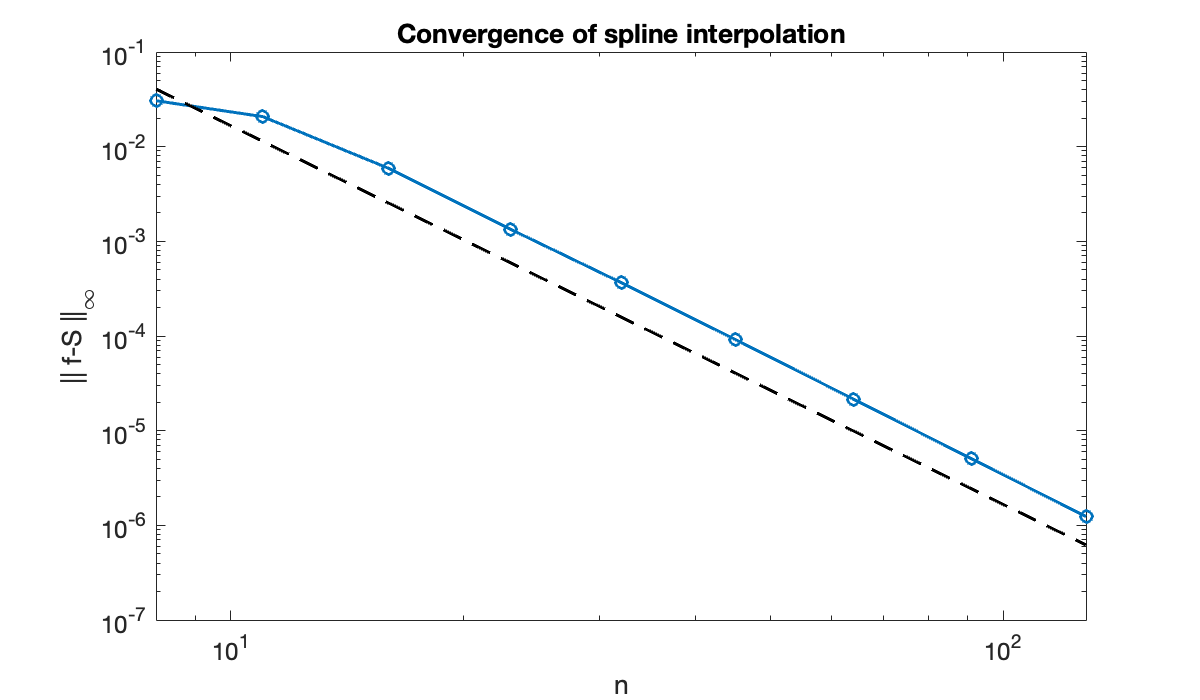

In [4]:
clf
loglog(n, maxerr, "-o", displayname="error")
order4 = 0.5 * maxerr(end) * (n / n(end)) .^ (-4);
hold on
loglog(n, order4, "k--", displayname="O(n^{-4})")
xlabel("n");  ylabel("|| f-S ||_{\infty}")
title(("Convergence of spline interpolation"));